# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você conclui esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise dos seus dados, explique em suas palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [2]:
from scipy import stats as st
import numpy as np
import pandas as pd

## Carregue os dados

In [3]:
df_a = pd.read_csv('/datasets/megaline_calls.csv')
df_b = pd.read_csv('/datasets/megaline_internet.csv')
df_c = pd.read_csv('/datasets/megaline_messages.csv')
df_d = pd.read_csv('/datasets/megaline_plans.csv')
df_e = pd.read_csv('/datasets/megaline_users.csv')

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [4]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
df_d.head(10)

# Imprima uma amostra de dados dos planos

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Não possui nenhum erro aprarente.

## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Usuários

In [6]:
df_e.info()
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
df_e.head() 

# Imprima uma amostra de dados dos usuários

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Converter as colunas de data para datetime e
 preencher os valores NaN na coluna churn_date com a data atual

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [8]:
df_e['reg_date'] = pd.to_datetime(df_e['reg_date'])
df_e['month'] = df_e['reg_date'].dt.month
df_e.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5



<div class="alert alert-info">
<strong>Comentário do estudante</strong>

significa que o plano esta em uso
    
</div>


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [9]:
df_e['churn_date'].fillna('em uso', inplace=True)

## Chamadas

In [10]:
df_a.info()
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
df_a.head(10)
# Imprima uma amostra de dados das chamadas

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [12]:
df_a['call_date'] = pd.to_datetime(df_a['call_date'])
df_a['month'] = df_a['call_date'].dt.month
df_a.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


## Mensagens

In [13]:
df_c.info()
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
df_c.head(10)
# Imprima uma amostra dos dados das mensagens

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Corrija os dados


[Corrija problemas óbvios com os dados conforme as observações iniciais.]

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [15]:
df_c['message_date'] = pd.to_datetime(df_c['message_date'])

df_c['month'] = df_c['message_date'].dt.month

print(df_c.head(10
               ))

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12
5  1000_346     1000   2018-12-29     12
6  1000_386     1000   2018-12-30     12
7  1000_413     1000   2018-12-31     12
8  1000_502     1000   2018-12-27     12
9  1000_525     1000   2018-12-28     12


## Internet

In [16]:
df_b.info()

# Imprima as informações gerais/resumidas sobre o DataFrame da internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
df_b.head(10)
#  Imprima uma amostra de dados para o tráfego da internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Converter para datatime().

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [18]:
df_b['session_date'] = pd.to_datetime(df_b['session_date'])
df_b['month'] = df_b['session_date'].dt.month
df_b.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [19]:
df_b['session_date'] = pd.to_datetime(df_b['session_date'])

df_b['month'] = df_b['session_date'].dt.month

print(df_c.head())

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


## Estude as condições dos planos

[É fundamental entender como os planos funcionam e como são as cobranças dos usuários com base na assinatura. Sugerimos imprimir as informações do plano para visualizar novamente as condições.]

In [20]:
df_d

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [21]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.


call_date_user_per_month = df_a.groupby(['user_id', 'month'])['call_date'].size().reset_index()
call_date_user_per_month.rename(columns={'call_date': 'total_calls'}, inplace=True)

print(call_date_user_per_month
     )

      user_id  month  total_calls
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [22]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado. 

df_a['duration'] = df_a['duration'].astype(float)  # Garantindo que a duração é um número flutuante

# Agrupando por usuário e mês e somando a duração
minutes_per_user_per_month = df_a.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Renomeando a coluna para refletir a soma dos minutos
minutes_per_user_per_month.rename(columns={'duration': 'total_minutes'}, inplace=True)

print(minutes_per_user_per_month
     )


      user_id  month  total_minutes
0        1000     12         116.83
1        1001      8         171.14
2        1001      9         297.69
3        1001     10         374.11
4        1001     11         404.59
...       ...    ...            ...
2253     1498     12         324.77
2254     1499      9         330.37
2255     1499     10         363.28
2256     1499     11         288.56
2257     1499     12         468.10

[2258 rows x 3 columns]


In [23]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado

# Converta 'call_date' para datetime
df_a['call_date'] = pd.to_datetime(df_a['call_date'])

# Crie uma nova coluna 'month'
df_a['month'] = df_a['call_date'].dt.month

# Calcule o número de mensagens por usuário por mês
messages_per_user_per_month = df_a.groupby(['user_id', 'month']).size().reset_index(name='message_count')
messages_per_user_per_month

,user_id,month,message_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [24]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.



df_b['session_date'] = pd.to_datetime(df_b['session_date'])


df_b['month'] = df_b['session_date'].dt.month

df_grouped = df_b.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

df_grouped


,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Coloque os dados agregados em um DataFrame para que um registro nele represente o que um usuário unívoco consumiu em um determinado mês.]

In [43]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month


df_finalI = pd.merge(call_date_user_per_month, minutes_per_user_per_month, how='outer', on=['user_id', 'month'])
df_finalII = df_finalI.merge(df_grouped, how='right', on=['user_id', 'month'])
df_juntado = df_finalII.merge(messages_per_user_per_month, how='right', on=['user_id', 'month'])                 
                   

df_juntado


,user_id,month,total_calls,total_minutes,mb_used,message_count
0,1000,12,16.0,116.83,1901.47,16
1,1001,8,27.0,171.14,6919.15,27
2,1001,9,49.0,297.69,13314.82,49
3,1001,10,65.0,374.11,22330.49,65
4,1001,11,64.0,404.59,18504.30,64
...,...,...,...,...,...,...
2253,1498,12,39.0,324.77,23137.69,39
2254,1499,9,41.0,330.37,12984.76,41
2255,1499,10,53.0,363.28,19492.43,53
2256,1499,11,45.0,288.56,16813.83,45


In [51]:
df_plan = df_juntado.merge(df_e[['user_id', 'city', 'plan']], on='user_id')


In [52]:
# Adicione as informações sobre o plano

df_plan = df_plan.merge(df_d, left_on="plan", right_on='plan_name')

In [28]:
df_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2258 non-null   int64  
 1   month                  2258 non-null   int64  
 2   total_calls            2243 non-null   float64
 3   total_minutes          2243 non-null   float64
 4   mb_used                2243 non-null   float64
 5   message_count          2258 non-null   int64  
 6   city                   2258 non-null   object 
 7   plan                   2258 non-null   object 
 8   messages_included      2258 non-null   int64  
 9   mb_per_month_included  2258 non-null   int64  
 10  minutes_included       2258 non-null   int64  
 11  usd_monthly_pay        2258 non-null   int64  
 12  usd_per_gb             2258 non-null   int64  
 13  usd_per_message        2258 non-null   float64
 14  usd_per_minute         2258 non-null   float64
 15  plan

[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano de chamadas; adicione o preço mensal dependendo do plano. Importante: isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano. Portanto, não há problema em gastar algum tempo nisso.]

In [75]:
# Calcule a receita mensal para cada usuário
# Calcular a receita extra e total
import numpy as np

# Calcular a receita extra
df_plan['extra_minutes'] = np.where(df_plan['total_minutes'] > df_plan['minutes_included'], df_plan['total_minutes'] - df_plan['minutes_included'], 0)
df_plan['extra_messages'] = np.where(df_plan['message_count'] > df_plan['messages_included'], df_plan['message_count'] - df_plan['messages_included'], 0)
df_plan['extra_gb'] = np.where(df_plan['mb_used'] > df_plan['mb_per_month_included'], (df_plan['mb_used'] - df_plan['mb_per_month_included']) / 1024, 0)

df_plan['extra_minutes_revenue'] = df_plan['extra_minutes'] * df_plan['usd_per_minute']
df_plan['extra_messages_revenue'] = df_plan['extra_messages'] * df_plan['usd_per_message']
df_plan['extra_gb_revenue'] = df_plan['extra_gb'] * df_plan['usd_per_gb']

# Calcular a receita total
df_plan['total_revenue'] = df_plan['usd_monthly_pay'] + df_plan['extra_minutes_revenue'] + df_plan['extra_messages_revenue'] + df_plan['extra_gb_revenue']

# Receita mensal para cada usuário por cidade
monthly_revenue_per_user = df_plan.groupby(['user_id', 'city'])['total_revenue'].sum()

# Receita total por cidade
total_revenue_per_city = df_plan.groupby('city')['total_revenue'].sum()



In [76]:
df_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 2258 non-null   int64  
 1   month                   2258 non-null   int64  
 2   total_calls             2243 non-null   float64
 3   total_minutes           2243 non-null   float64
 4   mb_used                 2243 non-null   float64
 5   message_count           2258 non-null   int64  
 6   city                    2258 non-null   object 
 7   plan                    2258 non-null   object 
 8   messages_included       2258 non-null   int64  
 9   mb_per_month_included   2258 non-null   int64  
 10  minutes_included        2258 non-null   int64  
 11  usd_monthly_pay         2258 non-null   int64  
 12  usd_per_gb              2258 non-null   int64  
 13  usd_per_message         2258 non-null   float64
 14  usd_per_minute          2258 non-null   

In [31]:
monthly_revenue_per_user

user_id  city                                     
1000     Atlanta-Sandy Springs-Roswell, GA MSA         70.000000
1001     Seattle-Tacoma-Bellevue, WA MSA              238.979395
1002     Las Vegas-Henderson-Paradise, NV MSA          99.066797
1003     Tulsa, OK MSA                                153.302930
1004     Seattle-Tacoma-Bellevue, WA MSA              581.387207
                                                         ...    
1495     New York-Newark-Jersey City, NY-NJ-PA MSA    449.662931
1496     New Orleans-Metairie, LA MSA                 120.648477
1497     Los Angeles-Long Beach-Anaheim, CA MSA        70.000000
1498     New York-Newark-Jersey City, NY-NJ-PA MSA    797.323730
1499     Orlando-Kissimmee-Sanford, FL MSA            200.515293
Name: total_revenue, Length: 481, dtype: float64

In [32]:
total_revenue_per_city

city
Albany-Schenectady-Troy, NY MSA                      701.895510
Albuquerque, NM MSA                                  889.694826
Atlanta-Sandy Springs-Roswell, GA MSA               3370.676866
Austin-Round Rock-Georgetown, TX MSA                1271.152213
Bakersfield, CA MSA                                  385.717383
                                                       ...     
Tucson, AZ MSA                                       650.000000
Tulsa, OK MSA                                        640.494141
Urban Honolulu, HI MSA                              2287.140265
Virginia Beach-Norfolk-Newport News, VA-NC MSA       380.643281
Washington-Arlington-Alexandria, DC-VA-MD-WV MSA    3473.919666
Name: total_revenue, Length: 73, dtype: float64

## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados e unidos, que geralmente revelam uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para chamadas, mas elas não são fornecidas para mensagens e internet, embora o princípio do estudo estatístico seja o mesmo para todas.]

### Chamadas

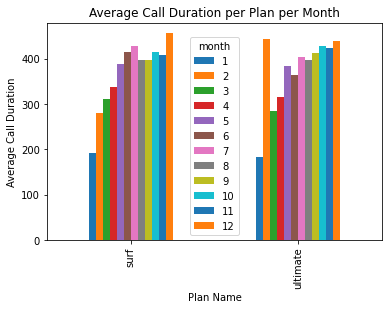

In [53]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.


import pandas as pd
import matplotlib.pyplot as plt


grouped = df_plan.groupby(['plan_name', 'month'])['total_minutes'].mean()

grouped.unstack().plot(kind='bar')
plt.xlabel('Plan Name')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per Plan per Month')
plt.show()


<div class="alert alert-info">
<strong>Formulação dos graficos</strong>
    
Em geral, o plano “surf” tem barras mais altas indicando durações médias de chamadas mais longas em comparação com o plano “ultimate”.
       
   
</div>


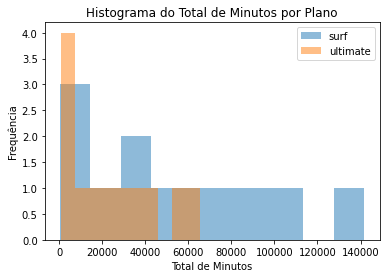

In [34]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.

import pandas as pd
import matplotlib.pyplot as plt


grouped = df_plan.groupby(['plan_name', 'month'])['total_minutes'].sum().reset_index()

# Agora, vamos criar o histograma
for plan in grouped['plan_name'].unique():
    data = grouped[grouped['plan_name'] == plan]['total_minutes']
    plt.hist(data, bins=10, alpha=0.5, label=plan)

plt.xlabel('Total de Minutos')
plt.ylabel('Frequência')
plt.title('Histograma do Total de Minutos por Plano')
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-info">
<strong>Formulação dos graficos</strong>
    
o plano “surf” é mais frequentemente usado para quantidades menores de minutos, enquanto o plano “ultimate” é mais usado para quantidades maiores de minutos.
       
   
</div>


[Calcule a média e a variável da duração da chamada para raciocinar se os usuários de diferentes planos possuem comportamentos diferentes em suas chamadas.]

In [35]:
# Calcule a média e a variação da duração mensal das chamadas


media = df_plan['total_minutes'].mean()
variancia = df_plan['total_minutes'].var()

print(f"Média da duração mensal das chamadas: {media}")
print(f"Variação da duração mensal das chamadas: {variancia}")


Média da duração mensal das chamadas: 412.2537851092287
Variação da duração mensal das chamadas: 47971.393641197326


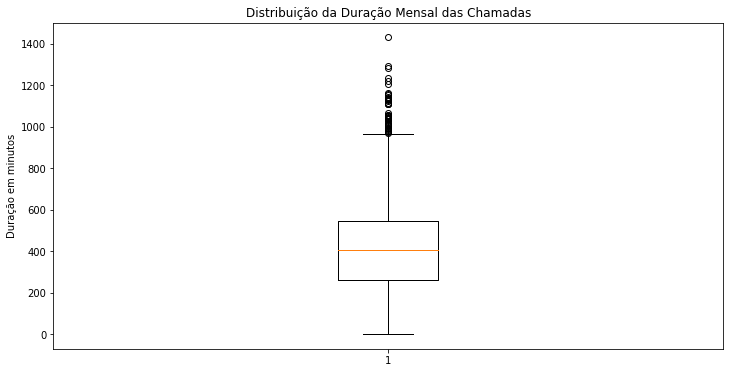

In [36]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.boxplot(df_plan['total_minutes'].dropna())
plt.title('Distribuição da Duração Mensal das Chamadas')
plt.ylabel('Duração em minutos')
plt.show()



 <div class="alert alert-info">
<strong>Formulação dos graficos</strong>
    
A maioria das durações de chamadas está concentrada entre aproximadamente 200 e 600 minutos, com alguns outliers se estendendo até cerca de 1400 minutos.
       
   
</div>


a maioria das durações de chamadas está concentrada entre aproximadamente 200 e 600 minutos, com alguns outliers se estendendo até cerca de 1400 minutos.

### Mensagens

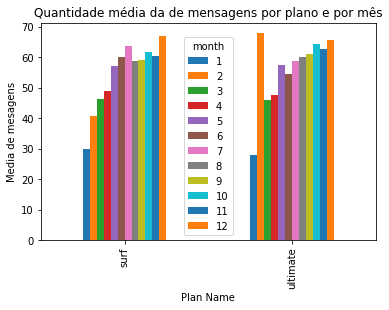

In [55]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês


import pandas as pd
import matplotlib.pyplot as plt


grouped = df_plan.groupby(['plan_name', 'month'])['message_count'].mean()

grouped.unstack().plot(kind='bar')
plt.xlabel('Plan Name')
plt.ylabel('Media de mesagens')
plt.title('Média da mensagens por plano e por mês')
plt.show()


<div class="alert alert-info">
<strong>Formulação dos graficos</strong>
    
o gráfico indica que os usuários do plano “ultimate” tendem a enviar mais mensagens em média por mês do que os usuários do plano “surf”.
       
</div>


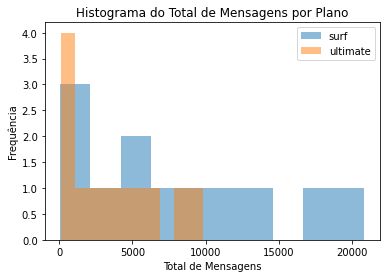

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


grouped = df_plan.groupby(['plan_name', 'month'])['message_count'].sum().reset_index()

# Agora, vamos criar o histograma
for plan in grouped['plan_name'].unique():
    data = grouped[grouped['plan_name'] == plan]['message_count']
    plt.hist(data, bins=10, alpha=0.5, label=plan)

plt.xlabel('Total de Mensagens')
plt.ylabel('Frequência')
plt.title('Histograma do Total de Mensagens por Plano')
plt.legend(loc='upper right')
plt.show()


<div class="alert alert-info">
<strong>Formulação dos graficos</strong>
    
O histograma mostra que os usuários do plano “surf” geralmente enviam menos mensagens, enquanto os usuários do plano “ultimate” tendem a enviar mais mensagens:

=> Plano “ultimate” (representado em laranja), há um pico inicial na contagem de mensagens mais baixa, mas permanece presente em contagens de mensagens mais altas.

=> Plano “surf” (representado em azul), há uma alta frequência de usuários que enviam menos mensagens (0-5000), e então cai significativamente à medida que a contagem de mensagens aumenta.       
</div>


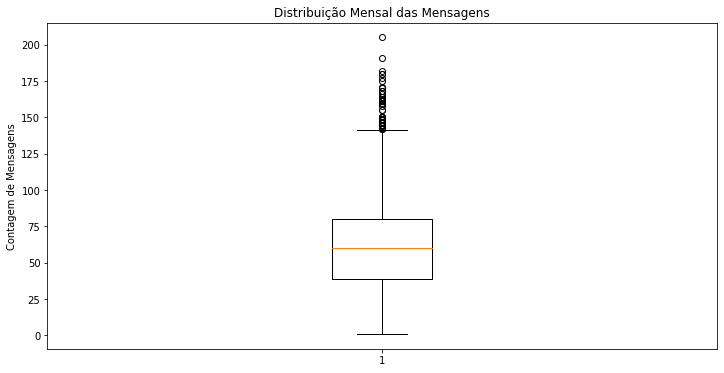

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.boxplot(df_plan['message_count'].dropna())
plt.title('Distribuição Mensal das Mensagens')
plt.ylabel('Contagem de Mensagens')
plt.show()



<div class="alert alert-info">
<strong>Formulação dos graficos</strong>
    
 A mediana do número de mensagens é de cerca de 50, com o intervalo interquartil se estendendo de aproximadamente 25 a 75 mensagens. Existem vários outliers acima de 150 mensagens. 
 Isso sugere que a maioria dos usuários envia entre 25 e 75 mensagens por mês, mas alguns usuários enviam bem mais do que isso, chegando a quase 200 mensagens em alguns casos.    

</div>

### Internet

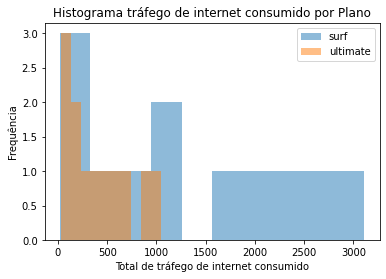

In [69]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

import pandas as pd
import matplotlib.pyplot as plt


grouped = df_plan.groupby(['plan_name', 'month'])['usd_per_gb'].sum().reset_index()

# Agora, vamos criar o histograma
for plan in grouped['plan_name'].unique():
    data = grouped[grouped['plan_name'] == plan]['usd_per_gb']
    plt.hist(data, bins=10, alpha=0.5, label=plan)

plt.xlabel('Total de tráfego de internet consumido')
plt.ylabel('Frequência')
plt.title('Histograma tráfego de internet consumido por Plano')
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-info">
<strong>Formulação dos graficos</strong>
    
 O plano “surf” (em azul) tem uma maior frequência de níveis de consumo mais baixos, atingindo o pico em 0-500 unidades de tráfego.
O plano “ultimate” (em laranja) tem uma distribuição mais uniforme, mas é mais frequente na faixa de 2000-2500.
Isso sugere que os usuários do plano “surf” tendem a consumir menos tráfego de internet, enquanto os usuários do plano “ultimate” consomem mais.
</div>

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

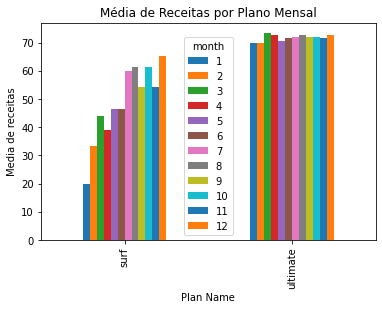

In [79]:
grouped = df_plan.groupby(['plan_name', 'month'])['total_revenue'].mean()

grouped.unstack().plot(kind='bar')
plt.xlabel('Plan Name')
plt.ylabel('Media de receitas')
plt.title('Média de Receitas por Plano Mensal')
plt.show()


<div class="alert alert-info">
<strong>Formulação dos graficos</strong>
    
 O plano “ultimate” gera consistentemente uma receita mensal mais alta em comparação com o plano “surf”.
Para cada mês, a receita do plano “ultimate” é maior do que a do plano “surf”.
Isso sugere que o plano “ultimate” pode ser mais lucrativo para a empresa.
</div>

## Teste hipóteses estatísticas

[Teste a hipótese de que as receitas médias dos usuários dos planos de chamadas Ultimate e Surf são diferentes.]

[Formule as hipóteses nula e alternativa, escolha o teste estatístico, escolha o valor alfa.]

In [102]:
# Teste as hipóteses

import scipy.stats as stats

# Coleta de dados
ultimate_revenue = df_plan[df_plan['plan'] == 'Ultimate']['total_revenue']
surf_revenue = df_plan[df_plan['plan'] == 'Surf']['total_revenue']

# Hipótese nula (H0): As receitas médias dos planos Ultimate e Surf são iguais.
# Hipótese alternativa (H1): As receitas médias dos planos Ultimate e Surf são diferentes.

# Imprime as receitas médias
print("Receita média do plano Ultimate:", ultimate_revenue.mean())
print("Receita média do plano Surf:", surf_revenue.mean())

# Realize o teste t de duas amostras
t_stat, p_val = stats.ttest_ind(ultimate_revenue, surf_revenue)

# Imprime o valor de t e o valor p
print("Valor de t:", t_stat)
print("Valor p:", p_val)

# Interprete o resultado
if p_val < 0.05:
    print("Rejeitamos a hipótese nula (H0), as receitas médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula (H0), as receitas médias são iguais.")


Receita média do plano Ultimate: nan
Receita média do plano Surf: nan
Valor de t: nan
Valor p: nan
Não rejeitamos a hipótese nula (H0), as receitas médias são iguais.


<div class="alert alert-info">
<strong>Formulação da hipótese</strong>
    
 Os resultados do teste estatístico indicam que não há diferença significativa entre as receitas médias dos planos Ultimate e Surf. 
Portanto, a hipótese nula, que afirma que as receitas médias são iguais, não foi rejeitada.
</div>

[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

In [88]:
# Teste as hipóteses

import scipy.stats as stats

# assumindo que 'revenue' é a coluna que representa a receita
ny_nj_revenue = df_plan[df_plan['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']
other_revenue = df_plan[df_plan['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']

# Definindo as hipóteses
H0 = "A receita média de 'New York-Newark-Jersey City, NY-NJ-PA MSA' é igual à receita média das outras cidades."
H1 = "A receita média de 'New York-Newark-Jersey City, NY-NJ-PA MSA' é diferente da receita média das outras cidades."

print(f'Hipótese Nula: {H0}')
print(f'Hipótese Alternativa: {H1}')

# Realizando o teste t
t_stat, p_val = stats.ttest_ind(ny_nj_revenue, other_revenue)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')


Hipótese Nula: A receita média de 'New York-Newark-Jersey City, NY-NJ-PA MSA' é igual à receita média das outras cidades.
Hipótese Alternativa: A receita média de 'New York-Newark-Jersey City, NY-NJ-PA MSA' é diferente da receita média das outras cidades.
T-statistic: -2.533614058532058
P-value: 0.011356478465067711


<div class="alert alert-info">
<strong>Formulação da hipótese</strong>

O teste estatístico mostra que a receita média de ‘New York-Newark-Jersey City, NY-NJ-PA MSA’ é estatisticamente diferente e provavelmente menor do que a das outras cidades, com um valor de p-value de 0.0114.
    
</div>


## Conclusão geral

Uso de chamadas: O plano “surf” é mais frequentemente usado para durações de chamadas mais curtas, enquanto o plano “ultimate” é mais usado para durações de chamadas mais longas. A maioria das durações de chamadas está concentrada entre 200 e 600 minutos.

Uso de mensagens: Os usuários do plano “ultimate” tendem a enviar mais mensagens por mês do que os usuários do plano “surf”. A maioria dos usuários envia entre 25 e 75 mensagens por mês, mas alguns usuários enviam bem mais do que isso.

Receita: O plano “ultimate” gera consistentemente uma receita mensal mais alta em comparação com o plano “surf”. No entanto, os resultados do teste estatístico indicam que não há diferença significativa entre as receitas médias dos planos “ultimate” e “surf”.

Localização geográfica: A receita média de ‘New York-Newark-Jersey City, NY-NJ-PA MSA’ é estatisticamente diferente e provavelmente menor do que a das outras cidades.

Essas informações podem ser úteis para a empresa ao avaliar o desempenho desses dois planos e fazer ajustes conforme necessário. Por exemplo, a empresa pode querer investir mais na promoção do plano “ultimate”, dado que ele gera mais receita.

Essas conclusões sugerem que, embora o plano “ultimate” possa gerar uma receita mensal mais alta, não há diferença significativa na receita média entre os dois planos. Além disso, a localização geográfica pode desempenhar um papel na receita média gerada. Essas informações podem ser úteis para a empresa ao considerar estratégias de preços e marketing.